In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Import the data
housing_df = pd.read_csv("Resources/housing_df_clean.csv")
print(housing_df.head(25))
print("Input file has been read in")

    MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig LandSlope  \
0           60       RL         65.0     8450      Reg    Inside       Gtl   
1           20       RL         80.0     9600      Reg       FR2       Gtl   
2           60       RL         68.0    11250      IR1    Inside       Gtl   
3           70       RL         60.0     9550      IR1    Corner       Gtl   
4           60       RL         84.0    14260      IR1       FR2       Gtl   
5           50       RL         85.0    14115      IR1    Inside       Gtl   
6           20       RL         75.0    10084      Reg    Inside       Gtl   
7           60       RL         70.0    10382      IR1    Corner       Gtl   
8           50       RM         51.0     6120      Reg    Inside       Gtl   
9          190       RL         50.0     7420      Reg    Corner       Gtl   
10          20       RL         70.0    11200      Reg    Inside       Gtl   
11          60       RL         85.0    11924      IR1    Inside

In [4]:
housing_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
MoSold           0
YrSold      

In [5]:
# Get dataframe field information
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  ExterQua

In [6]:
# Get value counts for all housing_df columns
for col in housing_df.columns:
    print(f'-------------------- {col} START --------------------')
    print(housing_df[col].value_counts(dropna=False))
    print(f'-------------------- {col} END ----------------------')
    print('\n')

print("Value counts for all housing_df columns Complete")

-------------------- MSSubClass START --------------------
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
-------------------- MSSubClass END ----------------------


-------------------- MSZoning START --------------------
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
-------------------- MSZoning END ----------------------


-------------------- LotFrontage START --------------------
LotFrontage
70.0     329
60.0     143
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
-------------------- LotFrontage END ----------------------


-------------------- LotArea START --------------------
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
       

In [13]:
# Get the features (everything except the "SalePrice" column)
X = housing_df.copy().drop(columns="SalePrice")
X.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Reg,Inside,Gtl,CollgCr,Norm,1Fam,...,548,TA,TA,0,61,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Reg,FR2,Gtl,Veenker,Feedr,1Fam,...,460,TA,TA,298,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,IR1,Inside,Gtl,CollgCr,Norm,1Fam,...,608,TA,TA,0,42,0,9,2008,WD,Normal
3,70,RL,60.0,9550,IR1,Corner,Gtl,Crawfor,Norm,1Fam,...,642,TA,TA,0,35,272,2,2006,WD,Abnorml
4,60,RL,84.0,14260,IR1,FR2,Gtl,NoRidge,Norm,1Fam,...,836,TA,TA,192,84,0,12,2008,WD,Normal


In [14]:
# Get the target column
y = housing_df["SalePrice"].values.reshape(-1,1)
y[0:5]

array([[208500],
       [181500],
       [223500],
       [140000],
       [250000]], dtype=int64)

In [ ]:
# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, random_state=13)
    

In [16]:
# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)




In [17]:
X_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,706,150,856,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,978,284,1262,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,486,434,920,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,216,540,756,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,655,490,1145,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0,953,953,...,False,False,False,True,False,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,790,589,1542,...,False,False,False,True,False,False,False,False,True,False
1457,70,66.0,9042,7,9,1941,2006,275,877,1152,...,False,False,False,True,False,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,49,0,1078,...,False,False,False,True,False,False,False,False,True,False


In [18]:
# # Use the Sklearn `train_test_split()` function to split the data into training and testing data
# X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

In [22]:
# Scale the training data
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train_encoded)

In [24]:
X_test_scaled = scaler.transform(X_test_encoded)

In [25]:
# Create a Random Forest model
Regressor = RandomForestRegressor(random_state=13)

# Fit (train) the model using the training data
Regressor.fit(X_train_scaled, y_train)

# Calculate the accuracy of the model on the testing data
Regressor.score(X_test_scaled, y_test)

C:\Users\mdadv\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7290299613612068

In [24]:
# Provided code to create the adjusted r-squared function
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)

In [31]:
# Compare the adjusted r-squared of the two models
adj_score1 = r2_adj(X_test_scaled, y_test, Regressor)
# adj_score2 = r2_adj(X_test_vif, y_test, lr2)
print(f"1 Feature Adjusted R2: {adj_score1}")
# print(f"2 Feature Adjusted R2: {adj_score2}")

1 Feature Adjusted R2: 0.7074447173423262


In [12]:
# # Create an X and y variable
# X = housing_df.drop(columns=['SalePrice'])
# y = housing_df['SalePrice']

In [13]:
# from sklearn.preprocessing import StandardScaler

In [15]:
# Create an X and y variable
X = housing_df.drop(columns=['SalePrice'])
y = housing_df['SalePrice']

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)


# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, random_state=13)

# Create a Random Forest model
classifier = RandomForestRegressor(random_state=13)

# Fit (train) the model using the training data
classifier.fit(X_train_encoded, y_train)

# Calculate the accuracy of the model on the testing data
classifier.score(X_test_encoded, y_test)




0.7290120540453826

In [9]:
# Calculate the accuracy of the model on the training data
classifier.score(X_train_encoded, y_train)

0.983738813036798

In [10]:
# Check the model's balanced accuracy on the test set

y_pred = classifier.predict(X_test_encoded)
print(balanced_accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
# Check the model's balanced accuracy on the training set

y_train_pred = classifier.predict(X_train_encoded)
print(balanced_accuracy_score(y_train, y_train_pred))

In [42]:
max_depths = range(1, 50)
models = {'train_score': [], 'test_score': [], 'max_depth': []}

# Loop through each value in max_depths
for depth in max_depths:
    clf = RandomForestClassifier(max_depth = depth)
    clf.fit(X_train_encoded, y_train)

    train_pred = clf.predict(X_train_encoded)
    test_pred = clf.predict(X_test_encoded)

    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['max_depth'].append(depth)

# Create a dataframe from the models dictionary with max_depth as the index
models_df = pd.DataFrame(models).set_index('max_depth')

C:\Users\mdadv\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mdadv\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mdadv\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mdadv\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mdadv\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mdadv\anaconda\Lib\site-packages\skl

C:\Users\mdadv\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mdadv\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mdadv\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mdadv\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mdadv\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\mdadv\anaconda\Lib\site-packages\skl

In [43]:
models_df

,train_score,test_score
max_depth,,
1,0.013192,0.004042
2,0.057083,0.002799
3,0.136013,0.004975
4,0.259637,0.004975
5,0.357527,0.009950
6,0.519104,0.003109
7,0.660030,0.003109
8,0.761703,0.013371
9,0.840943,0.001866


<Axes: xlabel='max_depth'>

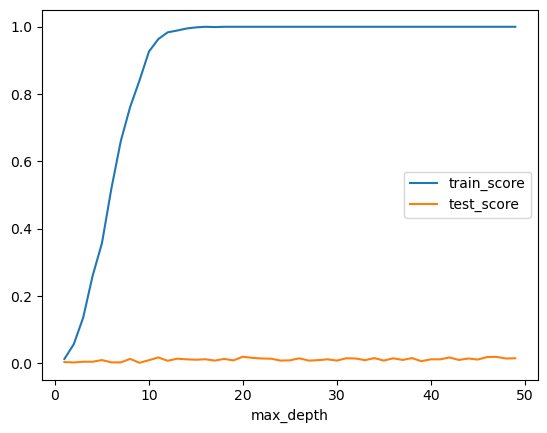

In [44]:
models_df.plot()

In [46]:
# clf = RandomForestClassifier(max_depth=5)
# clf.fit(X_train_encoded, y_train) 

# train_pred = clf.predict(X_train_encoded)
# test_pred = clf.predict(X_test_encoded)

# print(balanced_accuracy_score(y_train, train_pred))
# print(balanced_accuracy_score(y_test, test_pred))

0.3882442266918801
0.01243781094527363


C:\Users\mdadv\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
